## Script to parse the images to get the results into the dictionary

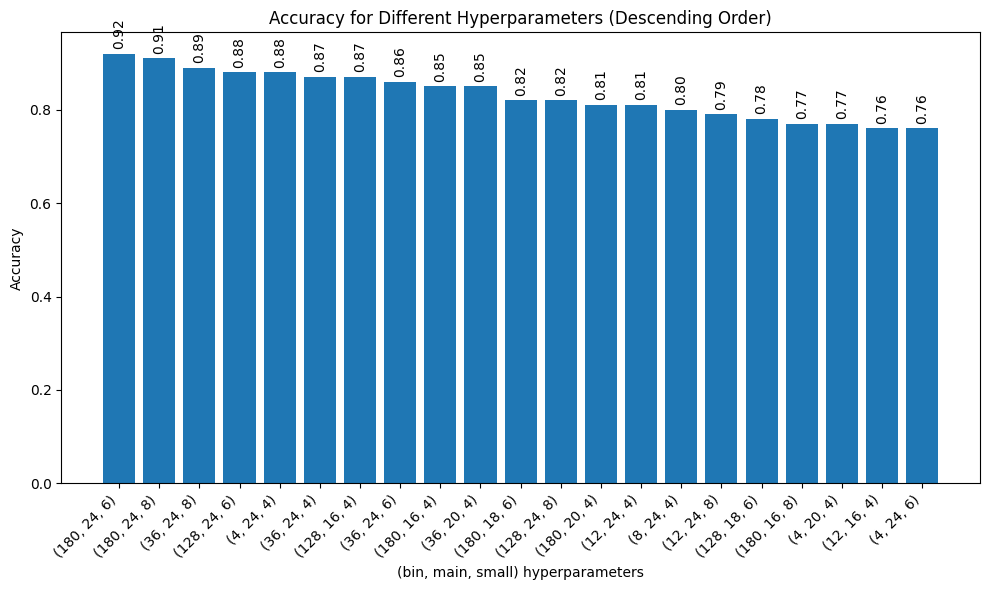

In [42]:
import matplotlib.pyplot as plt
import os
import re

# Set the working directory as the current directory for paths to work
directory = "outputImages/EvalImages/"

files = os.listdir(directory)

filtered_results = {}
# Iterate over each file
for file in files:
    file_name = os.path.splitext(file)[0]  # Get the file name without the extension
    if (file_name.startswith("eval_")):
        pattern = r'eval_bin(\d+)main(\d+)small(\d+)accuracy([\d.]+)'
        # Use re.match to find the pattern in the string
        match = re.match(pattern, file_name)
        # Extract the values
        if match:
            bin_val = int(match.group(1))
            main_win_val = int(match.group(2))
            small_win_val = int(match.group(3))
            accuracy_val = float(match.group(4))
            if bin_val not in filtered_results:
                filtered_results[bin_val] = {}
            if main_win_val not in filtered_results[bin_val]:
                filtered_results[bin_val][main_win_val] = {}
            filtered_results[bin_val][main_win_val][small_win_val] = accuracy_val

# Extract hyperparameters and accuracy values
bins = []
main_windows = []
small_windows = []
accuracies = []

for bin_val, main_dict in filtered_results.items():
    for main_win, small_dict in main_dict.items():
        for small_win, accuracy in small_dict.items():
            if (accuracy > 0.75):
                bins.append(bin_val)
                main_windows.append(main_win)
                small_windows.append(small_win)
                accuracies.append(accuracy)

# Zip hyperparameters and accuracies together
hyperparameters_accuracies = list(zip(bins, main_windows, small_windows, accuracies))

# Sort by accuracy in descending order
hyperparameters_accuracies.sort(key=lambda x: x[3], reverse=True)

# Unzip sorted hyperparameters and accuracies
bins_sorted, main_windows_sorted, small_windows_sorted, accuracies_sorted = zip(*hyperparameters_accuracies)

# Create bar chart with sorted data
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(range(len(accuracies_sorted)), accuracies_sorted, tick_label=[f"({b}, {m}, {s})" for b, m, s in zip(bins_sorted, main_windows_sorted, small_windows_sorted)])
ax.set_xlabel('(bin, main, small) hyperparameters')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy for Different Hyperparameters (Descending Order)')
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its accuracy value
for bar, accuracy in zip(bars, accuracies_sorted):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{accuracy:.2f}', ha='center', va='bottom', rotation='vertical')

plt.tight_layout()
plt.show()


